<a href="https://colab.research.google.com/github/effepivi/gvxr-tutorials/blob/main/ManualMotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session x

## Simulating X-ray projections and reconstructing the corresponding CT volume of an object that is moving using ![gVXR](https://github.com/effepivi/gvxr-tutorials/blob/main/img/gvxr_logo.png?raw=1)

## Author: Franck Vidal

(version 1.1, 24 May 2023)

# Aims of this session

**MUST UPDATE**

<!-- 1. ...;
2. ...; and
3. Reconstruct the CT volume using the [Core Imaging Library (CIL)](https://ccpi.ac.uk/cil/). -->

# Main steps

**MUST UPDATE**

<!-- 1. Simulate an X-ray projection of a Welsh dragon made of quartz

![Simulation of an X-ray projection of a Welsh dragon made of quartz](https://github.com/effepivi/gvxr-tutorials/blob/main/PoissonNoise/visualisation.png?raw=1)

2. Select the number of incident photons per pixel
3. Add the corresponding amount of Photonic noise 

![X-ray projection with Poisson noise](https://github.com/effepivi/gvxr-tutorials/blob/main/PoissonNoise/noisy-projection.png?raw=1)

4. Simulate a CT scan

![Scanning eometry](https://github.com/effepivi/gvxr-tutorials/blob/main/PoissonNoise/CT-geometry.png?raw=1)

5. Create the flat-field images with the corresponding amount of Photonic noise

![Average flat-field image with Poisson noise](https://github.com/effepivi/gvxr-tutorials/blob/main/PoissonNoise/average-flat-field.png?raw=1)

6. Reconstruct the CT volume using the [Core Imaging Library (CIL)](https://ccpi.ac.uk/cil/)

![Visualisation of the reconstructed 3D volume](https://github.com/effepivi/gvxr-tutorials/blob/main/PoissonNoise/plotCT.png?raw=1) -->

In [1]:
from notebook import notebookapp
servers = list(notebookapp.list_running_servers())

is_running_on_Google_Colab = False

if len(servers) > 0:
    if servers[0]["notebook_dir"] == '/':
        print("This notebook is executed using Google Colab")

        from google.colab import output
        output.enable_custom_widget_manager()        

        !pip install -q ipympl

        !pip install k3d
        !jupyter nbextension install --py --user k3d
        !jupyter nbextension enable --py --user k3d

        is_running_on_Google_Colab = True
    else:
        print("This notebook is executed using Code Ocean")

This notebook is executed using Google Colab
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.0/23.0 MB 33.0 MB/s eta 0:00:00
Installing /usr/local/lib/python3.10/dist-packages/k3d/static -> k3d
Making directory: /root/.local/share/jupyter/nbextensions/k3d/
Copying: /usr/local/lib/python3.10/dist-packages/k3d/static/require.js.LICENSE.txt -> /root/.local/share/jupyter/nbextensions/k3d/require.js.LICENSE.txt
Copying: /usr/local/lib/python3.10/dist-packages/k3d/static/standalone.js -> /root/.local/share/jupyter/nbextensions/k3d/standalone.js
Copying: /usr/local/lib/python3.10/dist-packages/k3d/static/require.js -> /root/.local/share/jupyter/nbextensions/k3d/require.js
Copying: /usr/local/lib/python3.10/dist-packages/k3d/static/standa

# Install gVXR, imagecodecs xpecgen, spekpy and SimpleITK

Run the cell below

```python
!pip3 install gvxr imagecodecs xpecgen git+https://bitbucket.org/spekpy/spekpy_release.git SimpleITK
```

In [2]:
if is_running_on_Google_Colab:
    !pip3 install -q gvxr imagecodecs xpecgen git+https://bitbucket.org/spekpy/spekpy_release.git SimpleITK

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 kB 51.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 14.8 MB/s eta 0:00:00


In [3]:
%matplotlib widget

# Copy files

This step is needed when the notebook is executed using Goggle Collaborative

Download the Sample if needed

In [4]:
import os
import urllib.request

def createDirectory(directory):
    # The directory does not exist
    if not os.path.exists(os.path.abspath(directory)):
    
        # Create the directory
        os.mkdir(os.path.abspath(directory))

def downloadFile(fname):
    if not os.path.exists(fname):
        base_url = "https://github.com/effepivi/gvxr-tutorials/raw/main"
        url = base_url + "/" + fname
        print("Download the polygon mesh (%s)" % fname)
        urllib.request.urlretrieve(url, fname)

createDirectory("input_data")
createDirectory("JSON")
createDirectory("ManualMotion")

downloadFile("input_data/welsh-dragon-small.stl")
downloadFile("energyResponseDetector.txt")
downloadFile("JSON/ManualMotion.json")
# downloadFile("ManualMotion/visualisation.png")

Download the polygon mesh (input_data/welsh-dragon-small.stl)
Download the polygon mesh (energyResponseDetector.txt)
Download the polygon mesh (JSON/ManualMotion.json)


In [5]:
import math
# import glob

from IPython.display import display
from IPython.display import Image

import matplotlib.pyplot as plt # Plotting
import numpy as np

from tifffile import imwrite

# from IPython.display import display
# from IPython.display import Image

import SimpleITK as sitk
import imageio
import matplotlib # To plot images

font = {'family' : 'serif',
         'size'   : 10
       }
matplotlib.rc('font', **font)

# Uncomment the line below to use LaTeX fonts
# matplotlib.rc('text', usetex=True)

# has_rtk = True
# try:
#     import itk
#     from itk import RTK as rtk
#     print("RTK detected")
# except:
#     has_rtk = False
#     print("RTK not detected")

# has_cil = True
# try:
#     from cil.processors import TransmissionAbsorptionConverter
#     from cil.utilities.display import show_geometry, show2D
#     from cil.recon import FBP, FDK
#     from cil.plugins.astra.processors.FDK_Flexible import FDK_Flexible
#     print("CIL detected")
# except:
#     has_cil = False
#     print("CIL not detected")

# has_cil_islider = True
# try:
#     from cil.utilities.jupyter import islicer
# except:
#     has_cil_islider = False

# has_tigre = True
# try:
#     import tigre
#     print("Tigre detected")
# except:
#     has_tigre = False
#     print("Tigre not detected")

# from ipywidgets import interact
# import ipywidgets as widgets

import base64

from gvxrPython3 import gvxr
from gvxrPython3 import json2gvxr
from gvxrPython3.utils import visualise
from gvxrPython3.utils import plotScreenshot
# from gvxrPython3.utils import interactPlotPowerLaw # Plot the X-ray image using a Power law look-up table
# from gvxrPython3.utils import saveProjections # Plot the X-ray image in linear, log and power law scales

# if has_cil:
#     from gvxrPython3.JSON2gVXRDataReader import *

SimpleGVXR 2.0.6 (2023-05-23T15:10:16) [Compiler: GNU g++] on Linux
gVirtualXRay core library (gvxr) 2.0.6 (2023-05-23T15:10:15) [Compiler: GNU g++] on Linux


## Initialise GVXR using our JSON file

In [6]:
json_fname = "JSON/ManualMotion.json"
json2gvxr.initGVXR(json_fname, renderer="EGL")

Create an OpenGL context: 1000x500


## Create the output directory

Retrieve the path of the notebook. On Macos it may change

In [7]:
import pathlib
root_path = str(pathlib.Path().resolve())
output_dir = root_path + "/ManualMotion"
print("The data will be saved in ", output_dir)
createDirectory(output_dir)

The data will be saved in  /content/ManualMotion


## Load our detector

In [8]:
json2gvxr.initDetector()

Set up the detector
	Detector position: [20.0, 0.0, 0.0, 'cm']
	Detector up vector: [0, 0, -1]
	Number of pixels: [800, 800]
	Detector number of pixels: [800, 800]
	Energy response: ../energyResponseDetector.txt in MeV
	Pixel spacing: [0.4, 0.4, 'mm']


In [9]:
number_of_rows = json2gvxr.params["Detector"]["NumberOfPixels"][1]
number_of_cols = json2gvxr.params["Detector"]["NumberOfPixels"][0]

## Load our source properties

In [10]:
json2gvxr.initSourceGeometry()

Set up the beam
	Source position: [-60.0, 0.0, 0.0, 'cm']
	Source shape: PointSource


In [11]:
spectrum, unit_of_energy, energy_set, bin_sets = json2gvxr.initSpectrum(verbose=0)

Text(0.5, 1.0, 'Corresponding spectra')

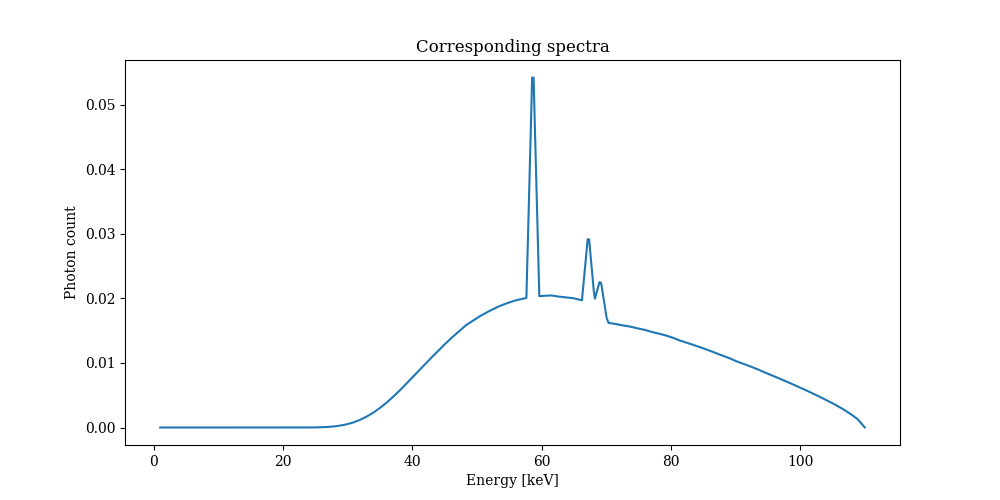

In [12]:
plt.figure(figsize=(10,5))
plt.plot(energy_set, bin_sets)
plt.xlabel("Energy [" + unit_of_energy + "]")
plt.ylabel("Photon count")
plt.title("Corresponding spectra")

## Load our samples

In [13]:
json2gvxr.initSamples(verbose=1)

Load the 3D data

	Load dragon in /content/JSON/../input_data/welsh-dragon-small.stl using mm
insert is a cube


In [14]:
# gvxr.moveToCentre("dragon")

ID = "root"
min_x, min_y, min_z, max_x, max_y, max_z = gvxr.getNodeAndChildrenBoundingBox(ID, "mm")
centre_x = (min_x + max_x) / 2.0
centre_y = (min_y + max_y) / 2.0
centre_z = (min_z + max_z) / 2.0

print("Bounding box:", [min_x, min_y, min_z], [max_x, max_y, max_z])
print("Bounding box centre:", [centre_x, centre_y, centre_z])

Bounding box: [-34.22738265991211, -77.55621337890625, -62.217071533203125] [34.22738265991211, 77.55621337890625, 62.217041015625]
Bounding box centre: [0.0, 0.0, -1.52587890625e-05]


## Let's get an x-ray image

We create an X-ray image `projection_in_MeV`. 
By default the image is expressed in MeV. 
We convert it to keV for display as follows: `projection_in_keV = projection_in_MeV / gvxr.getUnitOfEnergy("keV")`.

In [15]:
projection_in_MeV = np.array(gvxr.computeXRayImage(), dtype=np.single)
projection_in_keV = projection_in_MeV / gvxr.getUnitOfEnergy("keV")
gvxr.displayScene()

In [16]:
gvxr.setSceneRotationMatrix((-0.876441478729248,
 0.09831675887107849,
 -0.47136226296424866,
 0.0,
 -0.4762209951877594,
 -0.03233394771814346,
 0.878731369972229,
 0.0,
 0.07115307450294495,
 0.9946292638778687,
 0.07515932619571686,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0))
gvxr.setZoom(650)

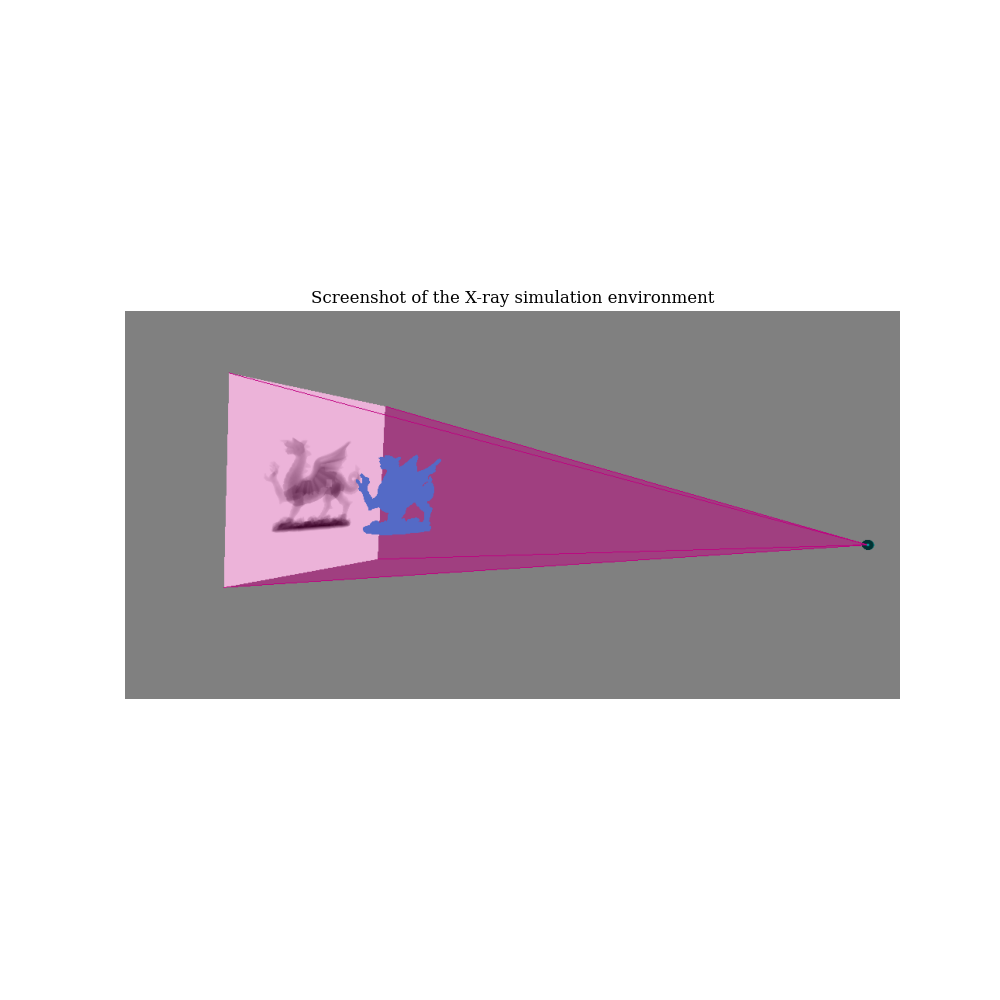

In [17]:
gvxr.displayScene()
plotScreenshot()

In [19]:
fname = output_dir + "/visualisation.png"

if not os.path.exists(fname):

    plot = visualise(use_log=True)
    plot.grid_visible = False
    plot.display()
    plot.camera = [-344.8138923741201, -430.4375366507148, 2.1587232900426985,
                   -202.5, 0, 0,
                   -0.00803416482955866, -0.0506693227374306, 0.9986831689424002]    
else:
    display(Image(fname, width=800))

Output()

In [20]:
if not os.path.exists(fname):
    if plot is not None:
     
        plot.fetch_screenshot()

        data = base64.b64decode(plot.screenshot)
        with open(output_dir + "/visualisation.png",'wb') as fp:
            fp.write(data)

In [21]:
def SimpleHarmonicMotion(A, t, T=None, f=None):
    # Translate the cube using a simple harmonic motion, i.e. a sinusoidal motion
    # A: amplitude
    # t: current time in seconds
    # T: time period in Hertz
    # f: frequency in seconds
    # T=1/f, f=1/T
    
    if T == f:
        raise IOError("Set either the frequency f or the period T")
    elif f == None:
        f = 1.0 / T
        
    omega = f * 2.0 * math.pi # Angular velocity in radians per second
    
    x = A * math.cos(omega * t)
    
    return x

In [22]:
exposure_in_msec = 10.0
period_set_in_msec = [1.0, 50.0, 25.0]

number_of_temp_images_per_projection = 15
number_of_projections = 5

x_ray_image_set = []
screenshot_set = []

old_position = [0.0, 0.0, 0.0]

amplitude_set = [0.0, 2.0, 1.0] # mm

displacement_set = [] # Array that stores the position of the insert
t_set = [] # Array that stores the time
start_acquisition_set = []

# Simulate a given number of projections
for i in range(number_of_projections):

    print("Image %i/%i" % (i + 1, number_of_projections), end='\r')

    # Compute the acquisition start time
    start_acquisition = i * exposure_in_msec
    start_acquisition_set.append(start_acquisition)
    
    # For each projection, compute a given number of temporary images that are going to be averaged.
    # Between the simulation of two successive images, trnalate an object.    

    temp_xray_image_set = [] # Array that stores the temporary images
    
    # Compute each temporary image for the current projection
    for t in np.linspace(start_acquisition, start_acquisition + exposure_in_msec, number_of_temp_images_per_projection, endpoint=False):

        # Compute the new position
        new_position = [SimpleHarmonicMotion(amplitude_set[0], t, T=period_set_in_msec[0]),
                        SimpleHarmonicMotion(amplitude_set[1], t, T=period_set_in_msec[1]),
                        SimpleHarmonicMotion(amplitude_set[2], t, T=period_set_in_msec[2])]
 
        # Translate the insert from the old position
        gvxr.translateNode("insert",
                           new_position[0] - old_position[0],
                           new_position[1] - old_position[1],
                           new_position[2] - old_position[2], "mm")
        
        # Record the new position
        old_position = new_position
        
        # Compute and store the new temporary image
        temp_xray_image_set.append(gvxr.computeXRayImage())
        
        # Store the new position and time
        displacement_set.append(new_position)
        t_set.append(t)
        
    gvxr.displayScene() # Display the 3D environment to generate a GIF animation
    screenshot_set.append(np.array(gvxr.takeScreenshot()) * 255) # This call is very long, but it is needed for a screenshot

    # Average the temporary images to compute the current projection and store the result
    x_ray_image_set.append(np.mean(temp_xray_image_set, axis=0, dtype=np.single))

# Convert the Python arrays into Numpy arrays
screenshot_set = np.array(screenshot_set, dtype=np.uint8)
displacement_set = np.array(displacement_set)

In [23]:
# Plot the timeline to make sure thee is no mistake
plt.plot(t_set)

In [24]:
# Plot the dislacement along the 3 axes
plt.scatter(t_set, displacement_set[:,0], label="X-axis", marker=".")
plt.scatter(t_set, displacement_set[:,1], label="Y-axis", marker=".")
plt.scatter(t_set, displacement_set[:,2], label="Z-axis", marker=".")
plt.legend()
plt.xlabel("Time (in ms)")
plt.ylabel("Displacement\n(in mm)")
plt.grid()

# The black lines depict the start acquisition time of the projections
for line in start_acquisition_set:
    plt.axvline(x = line, color = 'black')

In [25]:
# Save the X-ray projections
fname =  output_dir + "/projections.mha"

detector_size = np.array(gvxr.getDetectorSize("mm"))
number_of_pixels = np.array(gvxr.getDetectorNumberOfPixels())
spacing = detector_size / number_of_pixels

print("Projections saved in", fname)
sitk_image = sitk.GetImageFromArray(x_ray_image_set)
sitk_image.SetSpacing([spacing[0], spacing[0], spacing[1]])
sitk.WriteImage(sitk_image, fname, useCompression=True)

Projections saved in /content/ManualMotion/projections.mha


In [26]:
writer = imageio.get_writer(output_dir + "/movie.gif", mode='I')

matplotlib.rcParams.update({'font.size': 42})

for screenshot, xray_img in zip(screenshot_set, x_ray_image_set):
    
    ncols = 2
    nrows = 1

    f, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]}, figsize= (40, 20))

    ax0.set_title("Screenshot")
    ax0.imshow(screenshot)
    ax0.axis('off')
    
    ax1.set_title("X-ray projection")
    ax1.imshow(xray_img, cmap="gray")
    ax1.axis('off')

    plt.tight_layout()

    fname = 'temp.png'
    plt.savefig(fname, dpi=25)
    plt.close()

    # Add the image to the GIF file
    image = imageio.imread(fname)
    writer.append_data(image)                

# Delete the temporary file
os.remove("temp.png")

writer.close()

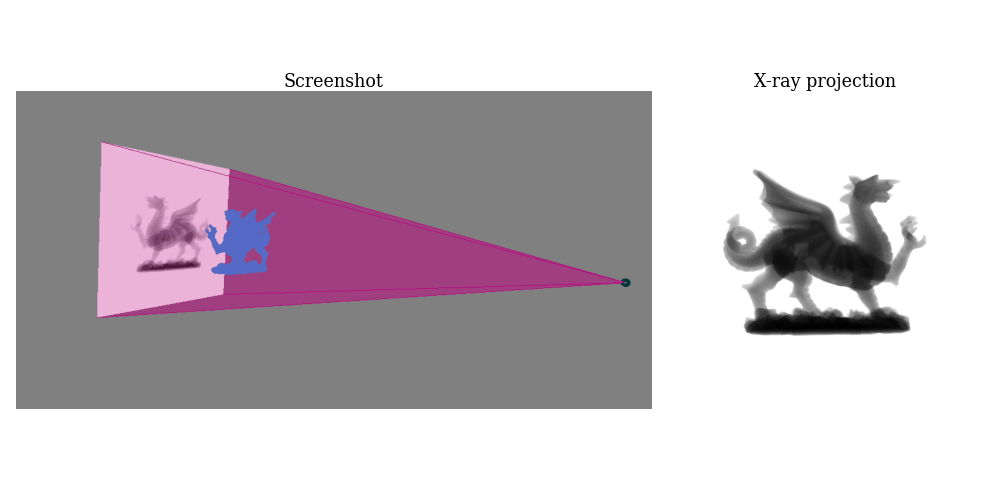

In [27]:
# Display the GIF animation
with open(output_dir + "/movie.gif",'rb') as f:
    display(Image(data=f.read(), format='png'))

# Cleaning up

Once we have finished it is good practice to clean up the OpenGL contexts and windows with the following command.

In [ ]:
gvxr.terminate()